#importing libraries and modules

In [23]:
import math

import numpy as np
import pandas as pd
import pandas_datareader.data as web
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import yfinance as yf

#importing Data set usign pd.DataReader()

In [25]:
ticker = yf.Ticker("BTC-USD")
df = ticker.history(period="max")

In [48]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0


#checking shape of the data



In [28]:
df.shape

(3485, 7)

#let's plot our close price only

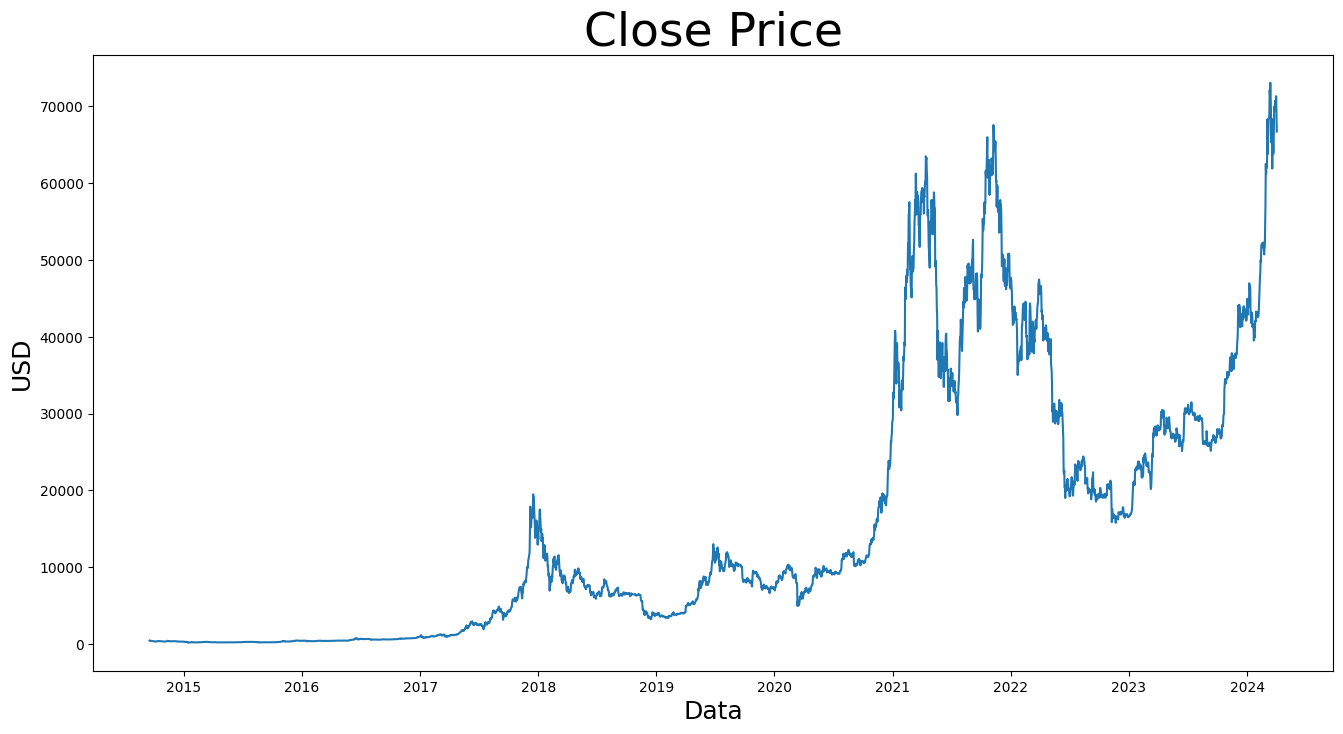

In [32]:
plt.figure(figsize=(16,8))
plt.title('Close Price', fontsize=34)
plt.plot(df['Close'])
plt.xlabel('Data', fontsize=18)
plt.ylabel('USD', fontsize=18)
plt.show()

#to work only with Close Price.  let's use .filter method

In [34]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

2788

#finally we Seperated dataframe. Lets start the normalization of the data

In [35]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00383005],
       [0.00337886],
       [0.00297225],
       ...,
       [0.95284032],
       [0.97599833],
       [0.91277148]])

#LSTM network needs to have the last output values of network layer for the input of the next layer of network. So we can't use train_test_split and randomize our train/test data

In [36]:
#Our model will predict the price by looking the last 60 days of price. this will help our model to predict a better price and not just a random number that would have less than %50 accuracy

# Creat the training dataset
train_data = scaled_data[0:training_data_len, :]
# Split the data into X_train and y_train data sets
X_train = []
y_train = []

for i in range(60, len(train_data)):
  X_train.append(train_data[i-60: i, 0])
  y_train.append(train_data[i, 0])


  if i <= 60:
    print(X_train)
    print(y_train)
    print()


[array([0.00383005, 0.00337886, 0.00297225, 0.00316576, 0.00302746,
       0.00307315, 0.00353455, 0.00336192, 0.00320238, 0.00310432,
       0.00303705, 0.00273063, 0.00270712, 0.00286455, 0.00281889,
       0.00270171, 0.00248828, 0.00206793, 0.00195331, 0.00208456,
       0.00216834, 0.00239814, 0.00256391, 0.0025164 , 0.00252651,
       0.0027494 , 0.00291214, 0.00305556, 0.00297193, 0.00280436,
       0.00282085, 0.00292624, 0.00290024, 0.00280832, 0.00285812,
       0.00281262, 0.00247326, 0.00247227, 0.00232038, 0.00242233,
       0.00239881, 0.0024623 , 0.00216017, 0.00229341, 0.00219762,
       0.00202517, 0.00202713, 0.00204993, 0.00209023, 0.00221359,
       0.00234807, 0.00225377, 0.00229592, 0.00253974, 0.00258995,
       0.00260052, 0.0033668 , 0.00332804, 0.0030137 , 0.00271626])]
[0.0028774137488077373]



In [37]:

len(X_train)

2728

#so now x_train has 2728 array which any of them contains 60 days of price in them and y_train contains 2083 days of price which is the price of the last 60 days.

In [38]:
# Convert the X_train and y_train to numpy array
X_train, y_train = np.array(X_train), np.array(y_train)

In [39]:
X_train.shape

(2728, 60)

#LSTM needs the data to be inputet by 3 dimension

In [40]:
# Reshape the data because LSTM needs 3 dim
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) # we make it like pros. it wanna say "np.reshape(X_train, (2083, 60, 1))"
X_train.shape

(2728, 60, 1)

In [41]:

# Create the testing dataset
# Create a new array containing scaled values from index 2083
test_data = scaled_data[training_data_len - 60 : , :]

#Create the data sets X_test and y_test
X_test = []
y_test = dataset[training_data_len : , :]
for i in range(60, len(test_data)):
  X_test.append(test_data[i-60 : i, 0])

In [42]:


# Convert the data to a numpy array
X_test = np.array(X_test)

In [43]:

# Reshape the test data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#Creating the model

In [44]:
# Build LSTM model
tf.random.set_seed(42)

model_1 = Sequential()
model_1.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1))) # we made it like pros ;) , the simple form is "input_shape(60, 1)""
model_1.add(LSTM(50, return_sequences=False))
model_1.add(Dense(25))
model_1.add(Dense(1))

In [45]:

# Compile the model
model_1.compile(optimizer='adam', loss='mse')

#Here we make a variable call callback which has the job to stop training the model whenever the loss is no longer decreasing

In [47]:
# Train the model
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)
history = model_1.fit(X_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
2728/2728 [==============================] - 88s 32ms/step - loss: 5.3398e-04
Epoch 2/10
2728/2728 [==============================] - 87s 32ms/step - loss: 3.5993e-04
Epoch 3/10
2728/2728 [==============================] - 89s 33ms/step - loss: 3.2609e-04
Epoch 4/10
2728/2728 [==============================] - 88s 32ms/step - loss: 3.0726e-04
Epoch 5/10
2728/2728 [==============================] - 89s 33ms/step - loss: 2.7119e-04
Epoch 6/10
2728/2728 [==============================] - 89s 32ms/step - loss: 2.9371e-04
Epoch 7/10
2728/2728 [==============================] - 87s 32ms/step - loss: 2.8112e-04
Epoch 8/10
2728/2728 [==============================] - 90s 33ms/step - loss: 2.7453e-04
Epoch 9/10
2728/2728 [==============================] - 88s 32ms/step - loss: 2.8536e-04
Epoch 10/10
2728/2728 [==============================] - 87s 32ms/step - loss: 2.6139e-04


In [49]:

# Get the model_1 predicted price values
predictions_1 = model_1.predict(X_test)
predictions_1 = scaler.inverse_transform(predictions_1)
print("Model_1 predicted price")
len(predictions_1)

22/22 [==============================] - 2s 19ms/step
Model_1 predicted price


697

In [50]:
# Get the root mean squared error (RMSE) for model_1
rmse = np.sqrt(np.mean(predictions_1 - y_test)**2)
rmse

190.75124557254304

Text(0.5, 0, 'epochs')

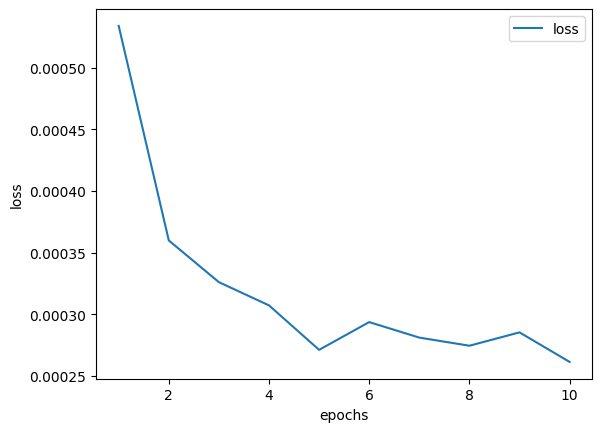

In [51]:

# Let's plot the history of model_1 and see what's going on
historyForPlot = pd.DataFrame(history.history)
historyForPlot.index += 1 # we plus 1 to the number of indexing so our epochs Plot picture will be counting from 1 not 0.
historyForPlot.plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [52]:

# Train the model again with 7 epochs
# but first we need to create another model so we can compare them together

# building LSTM model_2
tf.random.set_seed(42)

model_2 = Sequential()
model_2.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1))) # we made it like pros ;) | the simple form is "input_shape(60, 1)
model_2.add(LSTM(50, return_sequences=False))
model_2.add(Dense(25))
model_2.add(Dense(1))

# Compile model_2
model_2.compile(optimizer='Adam', loss='mse')

# Fit model_2
history_2 = model_2.fit(X_train, y_train, batch_size=1, epochs=6)

Epoch 1/6
2728/2728 [==============================] - 94s 33ms/step - loss: 0.0016
Epoch 2/6
2728/2728 [==============================] - 89s 33ms/step - loss: 6.9331e-04
Epoch 3/6
2728/2728 [==============================] - 90s 33ms/step - loss: 4.7906e-04
Epoch 4/6
2728/2728 [==============================] - 90s 33ms/step - loss: 3.8224e-04
Epoch 5/6
2728/2728 [==============================] - 88s 32ms/step - loss: 3.2873e-04
Epoch 6/6
2728/2728 [==============================] - 90s 33ms/step - loss: 3.3683e-04


In [53]:
# Get the model_2 predicted price values
predictions_2 = model_2.predict(X_test)
predictions_2 = scaler.inverse_transform(predictions_2)
len(predictions_2)

22/22 [==============================] - 2s 24ms/step


697

In [54]:
# Get the root mean squared error (RMSE) for model_2
rmse_2 = np.sqrt(np.mean(predictions_2 - y_test)**2)
rmse_2

333.1571424968615

#let's see what did our models with predictions and compare our 2 models together:

<ipython-input-57-8f41bf5e5744>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_1['Predictions'] = predictions_1
<ipython-input-57-8f41bf5e5744>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_2['Predictions'] = predictions_2


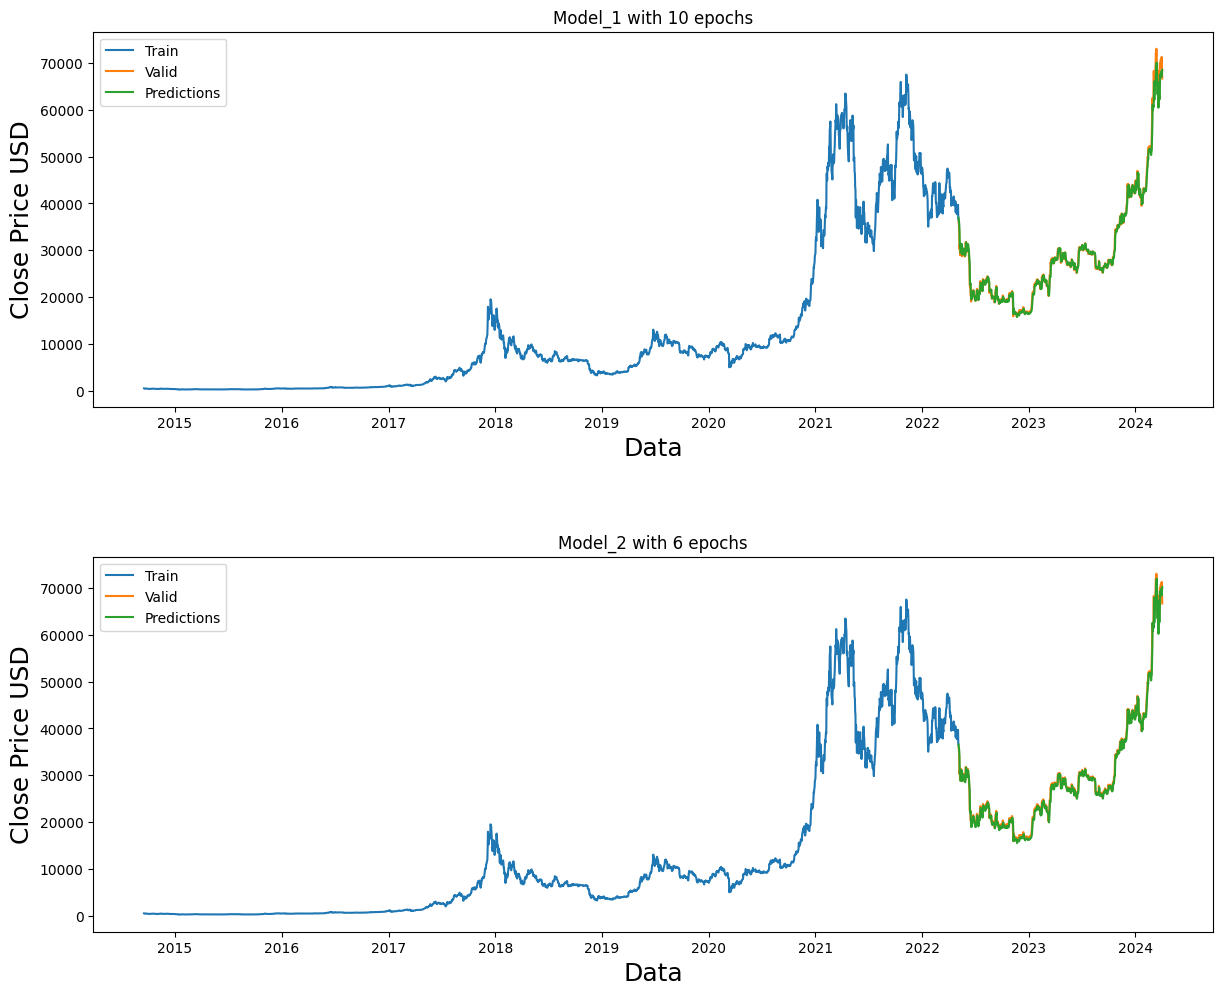

In [57]:

# Plot the data
train = data[:training_data_len]

#data for model_1
valid_1 = data[training_data_len:]
valid_1['Predictions'] = predictions_1

# data for model_2
valid_2 = data[training_data_len:]
valid_2['Predictions'] = predictions_2

# Visualized the data
#model_1
plt.figure(figsize=(14, 10))
plt.subplot(2, 1, 1)
plt.title('Model_1 with 10 epochs')
plt.xlabel('Data', fontsize=18)
plt.ylabel('Close Price USD', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid_1[['Close', 'Predictions']])

plt.legend(['Train', 'Valid', 'Predictions'], loc='upper left')

#model_2
plt.subplot(2, 1, 2)
plt.title('Model_2 with 6 epochs')
plt.xlabel('Data', fontsize=18)
plt.ylabel('Close Price USD', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid_2[['Close', 'Predictions']])

plt.legend(['Train', 'Valid', 'Predictions'], loc='upper left')

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1,
                    wspace=0.4,
                    hspace=0.4)
plt.show()


#Both models model_1 & model_2 has a better predictions  .It's time to predict a future day price which is not in train or test set. In other words we want to predict a price out of the dataframe which is the price of today

In [58]:

#Get the last 60 day closing price values and convert the datadrame to an array
last_60_days = data[-60:].values
# Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.fit_transform(last_60_days)
# create an empty list
new_X_test = []
# Append the past 60 days
new_X_test.append(last_60_days_scaled)
# Convert the X_test data set to a numpy array
new_X_test = np.array(new_X_test)
# Reshape the data
new_X_test = np.reshape(new_X_test, (new_X_test.shape[0], new_X_test.shape[1], 1))
# Get the predicted scaled price
pred_price = model_1.predict(new_X_test)
# Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


1/1 [==============================] - 0s 30ms/step
[[66344.86]]
